In [1]:
import numpy as np
import random

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        
        self.name = name
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def print_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        print('[DataGeneration]  ', str_of_kind, ' target value = ', dict(zip(unique, counts)).items())

        num_zeros = dict(zip(unique, counts))[0.0]  # key 0.0 에 대한 value 값 count 리턴
        num_ones = dict(zip(unique, counts))[1.0]  # key 1.0 에 대한 value 값 count 리턴

        print('[DataGeneration]  ', str_of_kind, ' zeros numbers = ', num_zeros, ', ratio = ', 100 * num_zeros / (data.shape[0]), ' %')
        print('[DataGeneration]  ', str_of_kind, ' ones numbers = ', num_ones, ', ratio = ', 100 * num_ones / (data.shape[0]), '%') 
    
        print('=======================================================================================================')
        
        
    # shuffle 기능을 이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.print_target_distribution(loaded_data, 'original data')
        
        
        # random.shuffle() 이용한 데이터 인덱스 분리 및 트레이닝/테스트 데이터 생성
        
        # 임시 저장 리스트
        training_data_list = []
        test_data_list = []

        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        #print("[DataGeneration]  total_data_num = ", total_data_num, ", test_data_num = ", test_data_num)

        # 전체 데이터 인덱스를 가지고 있는 리스트 생성
        total_data_index_list = [ index for index in range(total_data_num) ]

        # random.shuffle 을 이용하여 인덱스 리스트 생성
        random.shuffle(total_data_index_list)  # 전체 인덱스가 랜덤하게 섞여진 리스트로 변형된다

        # test data 를 위한 인덱스는 total_data_index_list 로뷰터 앞에서 분리비율(seperation_rate)의 데이터 인덱스
        test_data_index_list = total_data_index_list[ 0:test_data_num ]

        #print("[DataGeneration]  length of test_data_index_list = ", len(test_data_index_list))

        # training data 를 위한 인덱스는 total_data_index_list 에서 test data 인덱스를 제외한 나머지 부분
        training_data_index_list = total_data_index_list[ test_data_num: ]

        #print("[DataGeneration]  length of training_data_index_list = ", len(training_data_index_list))

        # training data 구성
        for training_data_index in training_data_index_list:
    
            training_data_list.append(loaded_data[training_data_index])

        # test data 구성
        for test_data_index in test_data_index_list:
    
            test_data_list.append(loaded_data[test_data_index])

        # generate training data from training_data_list using np.arrya(...)
        training_data = np.array(training_data_list)

        # generate test data from test_data_list using np.arrya(...)
        test_data = np.array(test_data_list)

        # verification shape
        #print("[DataGeneration]  training_data.shape = ", training_data.shape)
        #print("[DataGeneration]  test_data.shape = ", test_data.shape)

        # print target distribution of generated data 
        
        self.print_target_distribution(training_data, 'training data')
        
        self.print_target_distribution(test_data, 'test data')
        
        
        # save training & test data (.csv)
        training_data_save_path = './' + self.name + '_training_data.csv'
        test_data_save_path = './' + self.name + '_test_data.csv'
        
        # 저장공간이 없거나 파일 write 실패시 exception 발생
        try:
            np.savetxt(training_data_save_path, training_data, delimiter=',')
            np.savetxt(test_data_save_path, test_data, delimiter=',')
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))
        
        return training_data, test_data

In [3]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class Wine:
    
    def __init__(self, name, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 =  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        # name 초기화
        self.name = name
        
        print(self.name, " object is created !!!")
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
    
    # accuracy method
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        temp_list = []
        
        for index in range(len(input_data)):
            
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            (real_val, predicted_num) = self.predict(np.array(input_data[index], ndmin=2)) 
            
            if predicted_num == target_data[index]:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(target_data[index])
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        accuracy_result = len(matched_list) / len(input_data)
            
        print("Accuracy => ", accuracy_result)
            
        return matched_list, not_matched_list, index_label_prediction_list
    
    # train method
    def train(self, input_data, target_data):   
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
                        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨     
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        y = A3 = sigmoid(Z3)
        
        if y >= 0.5:
            predicted_num = 1
        else:
            predicted_num = 0
    
        return y, predicted_num

### DataGeneration class 이용하여 데이터 생성

In [4]:
# DataGeneration 객체 생성
seperation_rate = 0.4    # training data : test data = 6 : 4
target_position = -1

try:
    data_obj = DataGeneration('Wine', './(191116)wine.csv', seperation_rate, target_position)  
    (training_data, test_data) = data_obj.generate()
    
except Exception as err:
    print('Exception Occur !!')
    print(str(err))

[DataGeneration]  loaded_data.shape =  (6497, 13)
[DataGeneration]   original data  target value =  dict_items([(0.0, 4898), (1.0, 1599)])
[DataGeneration]   original data  zeros numbers =  4898 , ratio =  75.38864091118978  %
[DataGeneration]   original data  ones numbers =  1599 , ratio =  24.61135908881022 %
[DataGeneration]   training data  target value =  dict_items([(0.0, 2932), (1.0, 967)])
[DataGeneration]   training data  zeros numbers =  2932 , ratio =  75.19876891510644  %
[DataGeneration]   training data  ones numbers =  967 , ratio =  24.801231084893562 %
[DataGeneration]   test data  target value =  dict_items([(0.0, 1966), (1.0, 632)])
[DataGeneration]   test data  zeros numbers =  1966 , ratio =  75.67359507313319  %
[DataGeneration]   test data  ones numbers =  632 , ratio =  24.32640492686682 %


### hyper-parameter 설정 및 train 을 이용한 학습 진행

In [5]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 200  # hidden nodes 개수, 
o_nodes = 1    # output nodes 개수
lr = 1e-5      # learning rate
epochs = 200   # 반복횟수

# 손실함수 값을 저장할 list 생성
loss_val_list = []

# Wine 객체 생성
wine_obj = Wine('Wine', i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using BackPropagation...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        wine_obj.train( np.array(input_data, ndmin=2), np.array([target_data], ndmin=2) )  # 행렬로 입력
        
    if step % 10 == 0:
        print("epochs = ", step, "loss value = ", wine_obj.loss_val())
        
    # 손실함수 값 저장
    loss_val_list.append(wine_obj.loss_val()) 
    

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Wine  object is created !!!
Neural Network Learning using BackPropagation...
epochs =  0 loss value =  1.1711017873591443
epochs =  10 loss value =  0.2784971532480516
epochs =  20 loss value =  0.2313730288638357
epochs =  30 loss value =  0.22000933048078586
epochs =  40 loss value =  0.21352063054335918
epochs =  50 loss value =  0.2071264358091828
epochs =  60 loss value =  0.1996751798439996
epochs =  70 loss value =  0.19144440341892358
epochs =  80 loss value =  0.18335915016794846
epochs =  90 loss value =  0.17597423253974132
epochs =  100 loss value =  0.16935629756230489
epochs =  110 loss value =  0.1633950071839928
epochs =  120 loss value =  0.1579655112038056
epochs =  130 loss value =  0.15296550505257522
epochs =  140 loss value =  0.14831847528319939
epochs =  150 loss value =  0.14396918237060102
epochs =  160 loss value =  0.13987711747634235
epochs =  170 loss value =  0.13601132899929444
epochs =  180 loss value =  0.13234652076794914
epochs =  190 loss value =  0

In [6]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

(true_list, false_list, index_label_prediction_list) = wine_obj.accuracy(test_input_data, test_target_data) 

Accuracy =>  0.9207082371054658


In [7]:
print(index_label_prediction_list)

print('\nnumber of false => ', len(index_label_prediction_list))

[[7, 1.0, 0], [16, 0.0, 1], [19, 0.0, 1], [24, 1.0, 0], [26, 1.0, 0], [42, 1.0, 0], [54, 1.0, 0], [85, 1.0, 0], [87, 1.0, 0], [89, 1.0, 0], [90, 1.0, 0], [108, 1.0, 0], [113, 1.0, 0], [143, 1.0, 0], [146, 1.0, 0], [150, 1.0, 0], [151, 1.0, 0], [189, 1.0, 0], [197, 1.0, 0], [198, 1.0, 0], [200, 1.0, 0], [212, 1.0, 0], [218, 1.0, 0], [223, 0.0, 1], [233, 1.0, 0], [256, 0.0, 1], [270, 1.0, 0], [282, 1.0, 0], [291, 1.0, 0], [293, 1.0, 0], [294, 1.0, 0], [320, 1.0, 0], [338, 1.0, 0], [348, 1.0, 0], [370, 1.0, 0], [391, 0.0, 1], [392, 1.0, 0], [422, 1.0, 0], [432, 1.0, 0], [456, 1.0, 0], [484, 1.0, 0], [495, 1.0, 0], [521, 1.0, 0], [522, 1.0, 0], [525, 1.0, 0], [527, 1.0, 0], [547, 1.0, 0], [558, 1.0, 0], [589, 1.0, 0], [606, 1.0, 0], [609, 1.0, 0], [634, 1.0, 0], [644, 1.0, 0], [649, 1.0, 0], [655, 1.0, 0], [657, 0.0, 1], [668, 1.0, 0], [671, 1.0, 0], [684, 1.0, 0], [688, 1.0, 0], [702, 1.0, 0], [716, 1.0, 0], [729, 1.0, 0], [753, 1.0, 0], [761, 1.0, 0], [773, 1.0, 0], [779, 0.0, 1], [788, 

### 손실함수 추세 확인

200


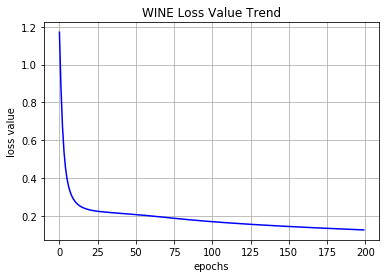

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

print(len(loss_val_list))

# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list)):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('WINE Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()